# Exploration of the GZ dataset

### Goal
In this notebook, we are interested in counting the number of user messages and words in each conversation.

### Results
* On average, there is 1.6 message per conversation.
* On average, there are 22 words per conversation, but the varaice is high.

In [2]:
import os
import pandas as pd
import json
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [3]:
basename = "/home/michael/Workspace/datasets/galaxy_zoo/"
path = os.path.join(basename, "GZ_talk_comments_notes_urls_AISSAI.csv")
print('Does dataset path exist ?', os.path.exists(path))

Does dataset path exist ? True


In [4]:
data = pd.read_csv(path)
print('Columns:', data.columns)
print('Number of lines:', len(data))
data.head()

Columns: Index(['locations', 'subject_id', 'subject_set_id', 'board_id', 'board_title',
       'board_description', 'discussion_title', 'comment_id', 'comment_body'],
      dtype='object')
Number of lines: 159704


,locations,subject_id,subject_set_id,board_id,board_title,board_description,discussion_title,comment_id,comment_body
0,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215478.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215478,876591,The zoom scale of this image is incorrect. I a...
1,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215746.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215746,894378,this seems to have a lens effect
2,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215478.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215478,894381,Agree with @user on scale difference. Answered...
3,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215566.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215566,894401,Looks like two galaxies merging
4,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215897.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215897,894403,appears to have 3 obvious bright objects lined...


### Group the conversations together

In [5]:
grouped_data = data.groupby('subject_id')
print('Number of conversations:', len(grouped_data))

Number of conversations: 99591


### Calculate the number of messages and words per conversation

In [6]:
ratio = len(data) / len(grouped_data)
ratio

1.6035987187597274

In [7]:
n_messages = []
n_caracters = []
for discussion_id, group in grouped_data:
    n_messages.append(len(group['comment_body']))
    group_list = group['comment_body'].tolist()
    for sentence in group_list:
        if isinstance(sentence, float):
            if np.isnan(sentence):
                group_list.remove(sentence)
    n_caracters.append(sum(len(sentence.split()) for sentence in group_list))
n_messages = np.array(n_messages)
n_caracters = np.array(n_caracters)

In [8]:
print(n_messages.mean())
print(n_caracters.mean())

1.6030263778855518
22.264752839111967


Text(0.5, 1.0, 'Number of words par conversation')

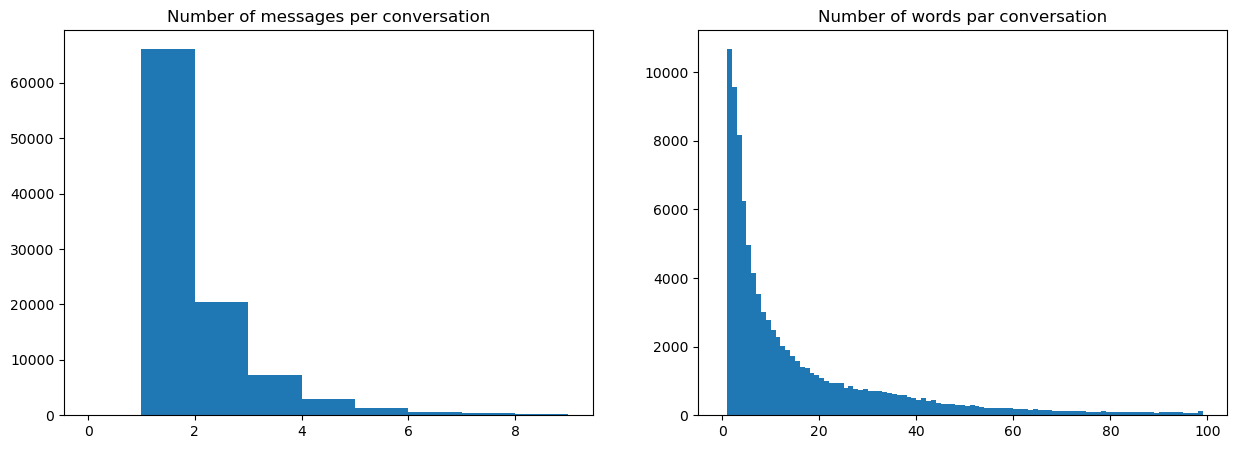

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(n_messages, bins=np.arange(10));
plt.title('Number of messages per conversation')
plt.subplot(1, 2, 2)
plt.hist(n_caracters, bins=np.arange(100));
plt.title('Number of words par conversation')